# Monte Carlo Simulation on Trades Data

Monte Carlo Simulation is a technique used to understand the impact of risk and uncertainty. In the simulation, a random value is selected based on the range of estimates. In this simulation, we will see how many trades' max drawdown lies below our risk appetite.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# load trades_37 data from our momentum algorithm
trades = pd.read_csv('trades_37.csv')
returns = trades['returns']

In [3]:
# equity and drawdown functions
def get_equity_curve(returns):
    equity_curve = (1 + (returns/100)).cumprod(axis=0)
    return equity_curve

def drawdown(equity_curve):
    eq_series = pd.Series(equity_curve)
    _drawdown = (eq_series / eq_series.cummax() - 1) * 100
    return _drawdown

def get_max_drawdown(equity_curve):
    abs_drawdown = np.abs(drawdown(equity_curve))
    _max_drawdown = np.max(abs_drawdown)
    return np.round_(_max_drawdown, decimals=2)

## Equity Curve Simulation

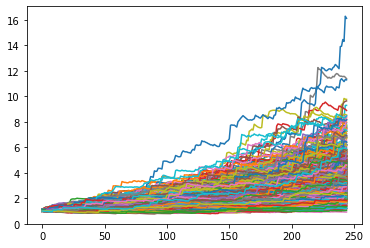

In [4]:
size = 1
drawdowns = []

# n of simulations
num_trials = 1000

# perform the simulations
for i in range(num_trials):
    returns_series = pd.Series(np.random.choice(returns, returns.size, replace=True))    
    # calculate equity curve
    eq = get_equity_curve(returns_series)
    # plot equity
    plt.plot(eq)
    # save drawdowns
    drawdowns.append(get_max_drawdown(eq))

plt.show();

## Drawdowns distribution

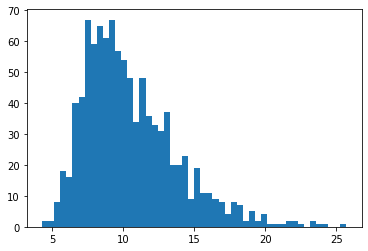

In [5]:
plt.hist(drawdowns, bins=50);

## Result

In [6]:
max_risk = 15
drawdowns_series = pd.Series(drawdowns)

pc_under_risk = ((drawdowns_series[drawdowns_series <= max_risk].count())/num_trials)*100
print("Drawdowns under maximum risk: {0:.2f} %".format(pc_under_risk))

Drawdowns under maximum risk: 89.70 %


## Conclusion

There are tons of ways to apply monte carlo simulation to improve trading performance, one of them is measuring drawdowns as we did. It is good to have over 90% trades within our risk appetite. 

It's important to remember that the simulation only represent probabilities and not certainty. Nevertheless, it is a valuable tool that is simple and straightforward when forecasting an unknown future.